In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Bandit_Algorithm:
    def __init__(self, eps, step, arms, q):
        self.eps = eps        #epsilon
        self.step = step      #timestep
        self.arms = arms      #choices every step
        self.q = q            #q_*(a)
        self.Q = np.zeros(self.arms)
        self.n = np.zeros(self.arms) #counts each arm
        self.counter = 0             #overall counter
        self.mean = 0                
        self.results = np.zeros(step)
        
    def run(self):
        for i in range(self.step):
            prob = np.random.rand()
            if prob < self.eps:
                a = np.random.randint(self.arms)
            else:
                a = np.argmax(self.Q)
        
            reward = np.random.normal(self.q[a],1) # R <- bandit(A)
            self.counter += 1
            self.n[a] += 1
            self.Q[a] = self.Q[a] + (reward - self.Q[a])/self.n[a] 
            self.mean = self.mean + (reward - self.mean)/self.counter
            
            self.results[i] = self.mean
            

In [3]:
q = np.random.normal(0,1, 10)
b_1 = np.zeros(1000)
b_2 = np.zeros(1000)
b_3 = np.zeros(1000)

for i in range(1000):
    bandit_1 = Bandit_Algorithm(0.1, 1000, 10, q)
    bandit_2 = Bandit_Algorithm(0.01, 1000, 10, q)
    bandit_3 = Bandit_Algorithm(0, 1000, 10, q)
    bandit_1.run()
    bandit_2.run()
    bandit_3.run()
    
    b_1 = b_1 + (bandit_1.results - b_1)/(i+1)
    b_2 = b_2 + (bandit_2.results - b_2)/(i+1)
    b_3 = b_3 + (bandit_3.results - b_3)/(i+1)
    

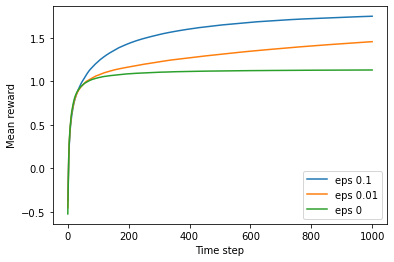

In [4]:
x_axes = np.linspace(0,1000, 1000)

plt.plot(x_axes, b_1, label = 'eps 0.1')
plt.plot(x_axes, b_2, label = 'eps 0.01')
plt.plot(x_axes, b_3, label = 'eps 0')
plt.xlabel("Time step")
plt.ylabel("Mean reward")
plt.legend()
plt.show()